In [14]:
import numpy as np
import matplotlib.pyplot as plt

* Create a 3D grid in configuration space with uniform density.

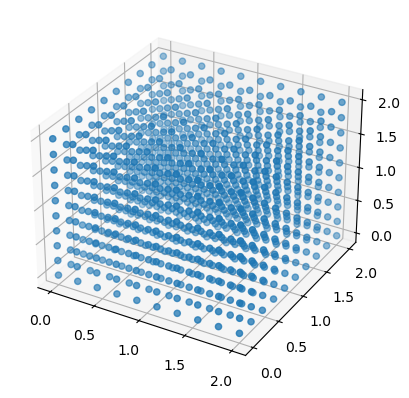

In [15]:
#Create the 3D grid:
N=10
X = np.linspace(0,2,N)
Y = np.linspace(0,2,N)
Z = np.linspace(0,2,N)
x,y,z = np.meshgrid(X,Y,Z)

# Create 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z)

# Display plot
plt.show()

* Compute fast fourier trasform


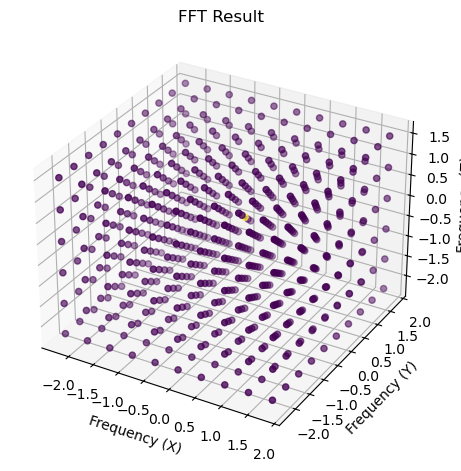

In [16]:
#FFT of the uniform density:
value = 1
uniform_density = np.full(x.shape,value)
#print(uniform_density)

# Perform FFT of uniform_density
#fft_result = np.fft.fftn(uniform_density) 
fft_result = np.fft.rfftn(uniform_density) #put r because some of the Fourier coefficient are dependent
#print(fft_result)

# Shift the zero frequency component to the center of the spectrum
#fft_result_shifted = np.fft.fftshift(fft_result)

# Calculate the shape of the FFT result
shape = fft_result.shape

# Calculate the frequencies corresponding to the FFT result
freq_x = np.fft.fftfreq(shape[0], d=(X[1] - X[0])) #d specifies the sample spacing(i.e distance between adjacent points)
freq_y = np.fft.fftfreq(shape[1], d=(Y[1] - Y[0]))
freq_z = np.fft.fftfreq(shape[2], d=(Z[1] - Z[0]))
#print(freq_x)

# Plot the original data and its FFT result
fig = plt.figure(figsize=(12, 6))
'''
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(x, y, z, c=uniform_density.flatten(), cmap='viridis')
#c=uniform_density.flatten() means that the color of each point in the scatter plot will be determined by the corresponding value in the flattened uniform_density array.
ax1.set_title('Original Data (Uniform Density)')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')
'''
# Create the grid for the FFT frequencies
freq_x_grid, freq_y_grid, freq_z_grid = np.meshgrid(freq_x, freq_y, freq_z, indexing='ij') #, indexing='ij'
#print(freq_x_grid.shape)

ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(freq_x_grid, freq_y_grid, freq_z_grid, c=np.abs(fft_result), cmap='viridis')
ax2.set_title('FFT Result')
ax2.set_xlabel('Frequency (X)')
ax2.set_ylabel('Frequency (Y)')
ax2.set_zlabel('Frequency (Z)')

plt.show()

* compute power spectrum


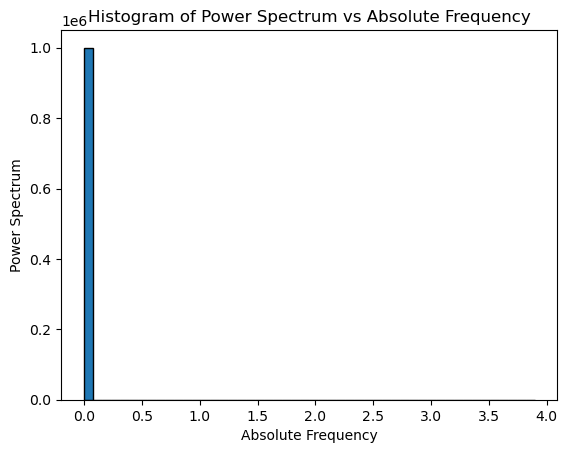

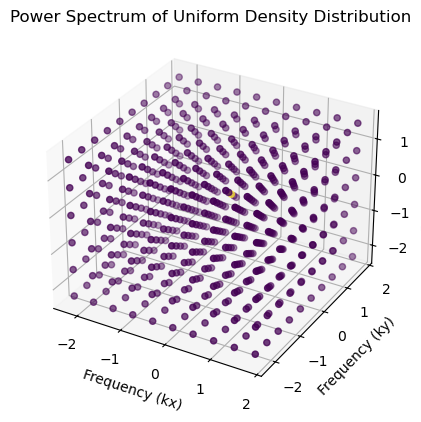

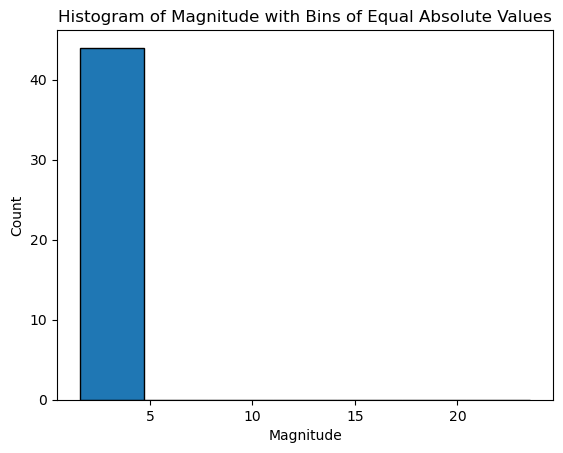

[[[0 0 0 0 0 0]
  [0 0 0 0 0 0]
  [0 0 0 0 0 0]
  [0 0 0 0 0 0]
  [0 0 0 0 0 0]
  [0 0 0 1 0 0]
  [0 0 0 0 0 0]
  [0 0 0 0 0 0]
  [0 0 0 0 0 0]
  [0 0 0 0 0 0]]

 [[0 0 0 0 0 0]
  [0 0 0 0 0 0]
  [0 0 0 0 0 0]
  [0 0 0 0 0 0]
  [0 0 0 0 0 0]
  [0 0 0 1 0 0]
  [0 0 0 0 0 0]
  [0 0 0 0 0 0]
  [0 0 0 0 0 0]
  [0 0 0 0 0 0]]

 [[0 0 0 0 0 0]
  [0 0 0 0 0 0]
  [0 0 0 0 0 0]
  [0 0 0 0 0 0]
  [0 0 0 0 0 0]
  [0 0 0 1 0 0]
  [0 0 0 0 0 0]
  [0 0 0 0 0 0]
  [0 0 0 0 0 0]
  [0 0 0 0 0 0]]

 [[0 0 0 0 0 0]
  [0 0 0 0 0 0]
  [0 0 0 0 0 0]
  [0 0 0 0 0 0]
  [0 0 0 1 0 0]
  [0 0 0 1 0 0]
  [0 0 0 1 0 0]
  [0 0 0 0 0 0]
  [0 0 0 0 0 0]
  [0 0 0 0 0 0]]

 [[0 0 0 0 0 0]
  [0 0 0 0 0 0]
  [0 0 0 0 0 0]
  [0 0 0 1 0 0]
  [0 0 0 1 0 0]
  [0 0 1 1 1 0]
  [0 0 0 1 0 0]
  [0 0 0 1 0 0]
  [0 0 0 0 0 0]
  [0 0 0 0 0 0]]

 [[0 0 0 1 0 0]
  [0 0 0 1 0 0]
  [0 0 0 1 0 0]
  [0 0 0 1 0 0]
  [0 0 1 1 1 0]
  [1 1 1 1 1 1]
  [0 0 1 1 1 0]
  [0 0 0 1 0 0]
  [0 0 0 1 0 0]
  [0 0 0 1 0 0]]

 [[0 0 0 0 0 0]
  [0 0 0 0 0

ValueError: x and y must have same first dimension, but have shapes (10, 10, 6) and (600, 600)

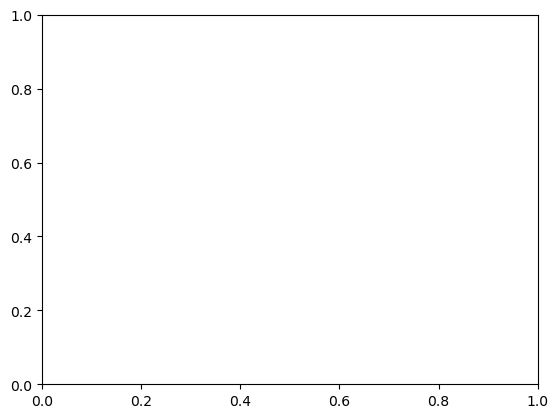

In [47]:
# Compute the power spectrum (it's the square of the absolute values of the Fourier coefficients.)
power_spectrum = np.abs(fft_result)**2
#print(power_spectrum.shape)
#print(power_spectrum)

#Compute the magnitude of k vector:
# Calculate the magnitude of frequencies
magnitude = np.sqrt(freq_x_grid**2 + freq_y_grid**2 + freq_z_grid**2)
#print(len(magnitude.flatten()))


# Plot the histogram
plt.hist(magnitude.flatten(), bins=50, weights=power_spectrum.flatten(), edgecolor='black')
plt.xlabel('Absolute Frequency')
plt.ylabel('Power Spectrum')
plt.title('Histogram of Power Spectrum vs Absolute Frequency')
plt.show()

# Plot the power spectrum
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the power spectrum in 3D
ax.scatter(freq_x_grid, freq_y_grid, freq_z_grid, c=power_spectrum.flatten(), cmap='viridis')
#flatten is used to convert a Nd array in a 1D array (for example: a matrix became a row of all numbers that there are in the matrix)
ax.set_title('Power Spectrum of Uniform Density Distribution')
ax.set_xlabel('Frequency (kx)')
ax.set_ylabel('Frequency (ky)')
ax.set_zlabel('Frequency (kz)')
plt.show()

#Plot the histogram of magnitude with equal absolute value
# Define the bin edges
#bin_edges = np.unique(magnitude) #np.unique tell me all the numbers
kmin = 2*np.pi / (X[N-1]-X[0]) #fundamental frequency--> kmin
kmax = 2*np.pi / (X[1] - X[0]) #kmax is nyquist frequency
binning = np.arange(kmin, kmax, kmin)
#print(X[N-1]-X[0])

# Compute the histogram (in y I put counts)
hist, bin_edges = np.histogram(magnitude, bins=binning)
# Plot the histogram
plt.bar(binning[:-1], hist, width=np.diff(binning), edgecolor='black')
plt.xlabel('Magnitude')
plt.ylabel('Count')
plt.title('Histogram of Magnitude with Bins of Equal Absolute Values')
plt.show()

# Compute the histogram (in y I put p(k))
# Digitize the data
bins_indices = np.digitize(magnitude, bin_edges)
print(bins_indices)

power_spectrum_mag = []
for i in range(len(bins_indices.flatten())):
    power_spectrum_mag.append(bins_indices.flatten()[i-1] + power_spectrum.flatten())

histo, bins_edges = np.histogram(magnitude, bins=binning)
'''
# Plot power_spectrum_mag against magnitude
plt.plot(magnitude, power_spectrum_mag, color='blue', marker='o', linestyle='-')

# Add labels and title
plt.xlabel('Magnitude')
plt.ylabel('Power Spectrum Magnitude')
plt.title('Power Spectrum Magnitude vs Magnitude')

# Show the plot
plt.show()
'''

* Interpolation


In [5]:
#Nearest Grid Point (NGP) interpolation is a simple method where the value at a specific point is taken from the nearest grid point
def ngp_interpolation(grid, points):
    interpolated_values = []
    for point in points:
        # Find the nearest grid point
        nearest_point = np.round(point).astype(int) #round=approx points (i.e 2.5->3) (useful to find the nearest grid point)
        #astype serves to to change the data type (in this case in an integer)

        # Check if the nearest point lies within the grid bounds
        #.all() look at all the elements of the array
        #grid.shape take me the dimension of the grid (i.e if the grid is a cube 10x10x10, shape take me (10,10,10) )
        #tuple is similar to a list but different because tuple can contain more type(int, float, string, ..) )
        if (nearest_point >= 0).all() and (nearest_point < grid.shape).all():
            interpolated_values.append(grid[tuple(nearest_point)])
        else:
            interpolated_values.append(np.nan)  # Point lies outside the grid
    
    return np.array(interpolated_values)

# Example usage
# Define a sample grid (3D array)
grid = np.random.rand(10, 10, 10)  # Example grid of shape (10, 10, 10)
print(grid)

# Define sample points to interpolate
points = np.array([[2.3, 4.5, 6.7], [8.9, 1.2, 3.4], [11.1, 12.3, 14.5]])

# Perform NGP interpolation
interpolated_values = ngp_interpolation(grid, points)
print("Interpolated values:", interpolated_values)

#DOMANDE
#Implement a Power spectrum estimator in pyACC
#giusto quello che mi è venuto?
#in che senso ripetere l'esercizio sopra?


[[[5.23579137e-01 2.73762101e-01 4.73383233e-01 7.52768632e-01
   3.73704436e-01 4.67172750e-02 9.65680444e-01 3.58898323e-03
   2.90400484e-02 7.96571481e-01]
  [8.56282774e-02 3.15811212e-01 5.90101905e-01 7.88591132e-01
   5.53986677e-01 7.45049815e-01 6.34763388e-01 2.35000105e-01
   5.97947090e-02 2.86328598e-01]
  [2.20803715e-01 4.41648209e-01 1.42246141e-02 9.73224692e-01
   9.46693421e-01 5.86087381e-01 6.80627703e-01 4.15044924e-01
   4.90647298e-01 8.48167880e-01]
  [8.56541494e-01 7.82819903e-01 5.94064247e-01 4.83540627e-01
   1.32264503e-01 1.84719225e-01 8.04480495e-01 4.42060899e-01
   8.30696948e-01 8.85599663e-01]
  [4.11318109e-01 1.51026256e-01 6.82871545e-01 4.98775723e-01
   3.62015112e-01 2.19269062e-01 8.74820222e-01 2.10400901e-01
   5.85617268e-01 8.19097801e-01]
  [7.43978319e-01 2.93064803e-01 5.76356366e-01 4.75611889e-01
   7.52190424e-01 9.64011471e-01 8.25962364e-01 9.29254430e-01
   2.85221665e-02 7.63403010e-01]
  [9.31663984e-01 5.63199460e-01 2.85966